# **CAPSTONE PROJECT: BATTLE OF THE NEIGHBORHOODS**
---
## **Assessment of the Relocation Options**
___


### _Table of Contents_

1. [Purpose](#1)<br>
2. [Introduction](#2)<br>
3. [Data Acquisition](#3) <br>
4. [Methodology](#4) <br>
5. [Box Plots](#8) <br>
6. [Scatter Plots](#10) <br>
7. [Bubble Plots](#12) <br> 

***

### _1. PURPOSE_ <a id="1"></a>
This is the final project for IBM Data Science Professional Certificate. The main purpose of this project is to apply data science methodologies to analyze available data and provide recommendation for the best option for family relocation.
***

### _2. INTRODUCTION_ <a id="2"></a>
For my final project I decided to explore the potential options for relocation to Kitchener or Waterloo, Ontario. In the current economic situation in Western Canada some families can consider potential relocation to other provinces. This project mainly inspired by my personal thoughts and I used it as an opportunity to practice what I learned during this course.

There are several open resources where people can find information about potential target location, but most of the time it is unstructured and, in many cases, biased information. Some websites based only tourist attractions and reviews; others pulled information from real estate agencies, food chains, etc. When someone decided to conduct a research about particular town or area, in the best case it would take more than a dozen of different search requests. The results might be not as informative as it was anticipated. Eventually it is going to be a question – what is next? Where to look for more information? 

The purpose of this project is to collect all available open source data, apply data analytics methodologies and provide recommendation based on statistical data. The recommendations would present comparison of options based on rental prices, access to recreational areas, schools, etc. 

For this project the data was used from the following sources: 
* Canada Mortgage and Housing Corporation (CMHC) 
* Open Data from City of Kitchener website 
* Foursquare City Guide 
* Wikipedia.
***

### _3. DATA ACQUISITION_ <a id="3"></a>
The following data was acquired from public sources:

[**Canada Mortgage and Housing Corporation (CMHC)**](https://www03.cmhc-schl.gc.ca/hmip-pimh/en#TableMapChart/0850/3/Kitchener%20-%20Cambridge%20-%20Waterloo) 

From CMHC retrieved the data containing “Kitchener-Cambridge-Waterloo — Average Rent by Bedroom Type by Zone”. This data would be used to extract average apartment rental prices as of October 2019. 

[**Kitchener GeoHub**](https://open-kitchenergis.opendata.arcgis.com/) 

Kitchener GeoHub is part of Waterloo region open data initiative and contain variety of the information. The retrieved shape files and datasets used to generate JavaScript Object Notation (JSON) files for Kitchener and Waterloo with following information: ward numbers, ward boundaries, neighborhoods, addresses, education facilities. To create necessary JSON files the third party software was used - [QGIS](https://qgis.org/en/site/) A Free and Open Source Geographic Information System (c).

[**Foursquare City Guide**](https://foursquare.com/) 

The FourSquare API would be used to explore and retrieve the data containing up to date information about venues and point of interests in Kitchener and Waterloo. The result would be in the form of JSON file and include the following information:
* Venue ID
* Venue Name
* Coordinates : Latitude and Longitude
* Category Name

[**Wikipedia**](https://en.wikipedia.org/wiki/Kitchener_City_Council)

Wikipedia used to retrieve data containing city of Kitchener Ward list and communities included in each Ward. 

**Note:** For city of Waterloo there is no such information available. For this project the dataset containing similar information in CSV format  was manually created. The data gathered from several websites: 
* Real estate agents 
* Wikipedia 
* City of Waterloo 
* Google Maps
***

### _4. METHODOLOGY_ <a id="4"></a>

#### _4.1. DATA SELECTION_
For the project data used only from open sources. There were two targets selected for this project – Kitchener and Waterloo in Ontario, both cities are connected to each other. The communities/neighborhoods are relatively small with not too many venues in each separate community. The best option to group communities is by using Ward numbers. In average every Ward includes three communities. Total 17 wards (ten in Kitchener and seven in Waterloo).

This project requires dataset containing Ward numbers and coordinates of the geographical center of the ward area. This information would be used as a reference point to explore and retrieve data for venues from FourSquare. 

The “ready-to-go” dataset containing center coordinates was not available and had to be created manually. The best source for required data is Kitchener GeoHub. The website provides various statistical data, maps, dataset, etc., in form of CSV or shape files. The following shape files were created on Kitchener GeoHub: 
* Addresses – physical address of the buildings in Waterloo area
* Ward Boundaries – file containing polygons for every Ward in both cities
* Educational Facilities – locations of every educational institution in both cities.

These shape files were loaded to QGIS © software to create customized JSON files. For the Ward center file the coordinates of the building in geographical center of the ward area was used. After selecting 17 addresses the JSON file was generated. For the educational facilities file no cleaning or manual selection were required – shape files were loaded and JSON files generated.

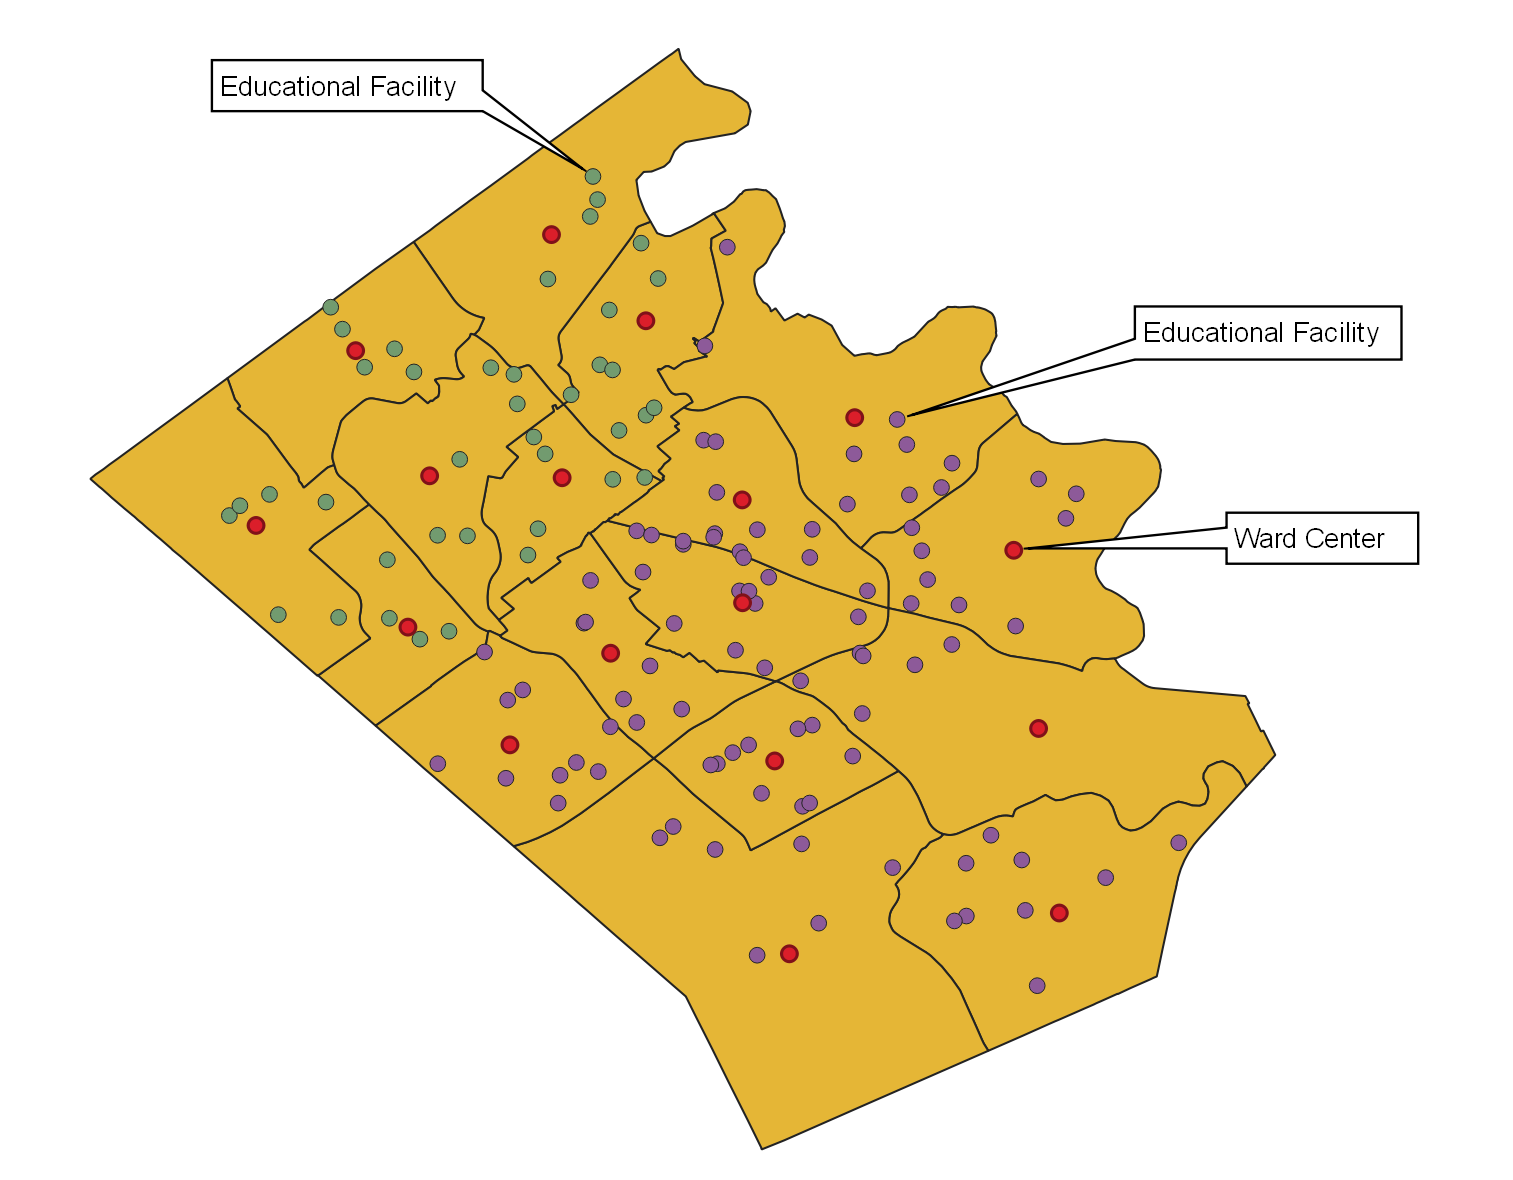

List of communities/neighborhoods was created manually from several sources, such as real estate agencies and Wikipedia. The resulted files were in CSV format and ready to upload to the notebook.

The average monthly rental price data was acquired from CMHC website in form of CSV file.

#### _4.1. DATA CLEANING_
Data was loaded to Jupiter Notebook for further work. Except manually created CSV files all datasets created from JSON files require additional cleaning, grouping and normalization.

The table shown below is the final dataset containing Ward unique ID, ward center coordinates and communities list.


|	Latitude	|	Longitude	|	Municipality	|	Ward	|	Community
|	- - - - - - - -	|	- - - - - - - -	|	- - - - - - - -	|	- - - - - - - -	|	- - - - - - - -
|	43.44183516	|	-80.42731253	|	Kitchener	|	k02	|	Stanley Park, Centreville
|	43.50533723	|	-80.51575545	|	Waterloo	|	w04	|	Colonial Acres, Rural East Country Squire, Glenridge, Eastbridge
|	43.48892327	|	-80.49853611	|	Waterloo	|	w05	|	Lexington and University Downs, Lincoln Heights, Lincoln Village
|	43.47046663	|	-80.55186311	|	Waterloo	|	w06	|	Beechwood, Uptown Waterloo North, Maple Hills
|	43.44702464	|	-80.56254102	|	Waterloo	|	w01	|	Beechwood West, Upper Beechwood, Westvale
|	43.49248702	|	-80.56311178	|	Waterloo	|	w03	|	Lakeshore, Lakeshore North/Conservation Meadows, Parkdale
|	43.46752806	|	-80.59171463	|	Waterloo	|	w02	|	Clair Creek Meadows, Clair Hills, Erbsville, Laurelwood, Vista Hills
|	43.41279575	|	-80.42895939	|	Kitchener	|	k03	|	Parkway, Vanier, Country Hills East, Hidden Valley, Pioneer Tower
|	43.41523759	|	-80.48778382	|	Kitchener	|	k06	|	Laurentian Hills, Country Hills, Alpine Village
|	43.46750655	|	-80.45676691	|	Kitchener	|	k01	|	Bridgeport, RiverRidge, Rosemount, Heritage Park
|	43.43707244	|	-80.51932757	|	Kitchener	|	k08	|	Forest Hills, Victoria Hills
|	43.45767164	|	-80.48457583	|	Kitchener	|	k10	|	Fairfield, Northward, Central Frederick, Auditorium, King East, Eastwood
|	43.4253858	|	-80.54489523	|	Kitchener	|	k07	|	Forest Heights, Waldau
|	43.44130888	|	-80.48855592	|	Kitchener	|	k09	|	Victoria Park, Southdale, Cherry Hill, Rockway
|	43.46636455	|	-80.52301221	|	Waterloo	|	w07	|	Uptown Waterloo South, Westmount
|	43.38415865	|	-80.4921803	|	Kitchener	|	k05	|	Laurentian West, Huron Park, Williamsburg
|	43.38286678	|	-80.43175205	|	Kitchener	|	k04	|	Strasburg, Doon





